In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
pd.options.display.max_rows = 10
sns.set(context='notebook', rc={'figure.figsize': (8, 5)})

In [29]:
# Using https://covid-19-au.github.io/ data
# https://github.com/covid-19-au/covid-19-au.github.io/blob/dev/src/data/country.json
au_data = {
  "2020-1-25":[4,0,0,4],
  "2020-1-27":[5,0,0,5],
  "2020-1-29":[7,0,0,7],
  "2020-1-30":[9,0,0,9],
  "2020-2-1":[10,0,0,10],
  "2020-2-2":[12,0,0,12],
  "2020-2-8":[15,5,0,10],
  "2020-2-12":[15,5,0,10],
  "2020-2-13":[15,6,0,9],
  "2020-2-16":[15,8,0,7],
  "2020-2-17":[15,8,0,7],
  "2020-2-18":[15,8,0,7],
  "2020-2-19":[15,10,0,5],
  "2020-2-20":[17,10,0,7],
  "2020-2-21":[21,10,0,11],
  "2020-2-22":[22,10,0,12],
  "2020-2-23":[22,10,0,12],
  "2020-2-24":[22,15,0,7],
  "2020-2-25":[23,15,0,8],
  "2020-2-26":[23,15,0,8],
  "2020-2-27":[23,15,0,8],
  "2020-2-28":[25,15,0,10],
  "2020-2-29":[26,15,0,11],
  "2020-3-1":[29,15,1,14],
  "2020-3-2":[33,21,1,11],
  "2020-3-3":[41,21,1,19],
  "2020-3-4":[52,21,2,29],
  "2020-3-5":[57,21,2,34],
  "2020-3-6":[63,22,2,39],
  "2020-3-7":[73,22,2,49],
  "2020-3-8":[80,22,3,55],
  "2020-3-9":[92,22,3,67],
  "2020-3-10":[112,22,3,87],
  "2020-3-11":[127,22,3,102],
  "2020-3-12":[156,22,3,131],
  "2020-3-13":[198,22,3,173],
  "2020-3-14":[249,22,3,224],
  "2020-3-15":[289,25,5,259],
  "2020-3-16":[367,25,5,337],
  "2020-3-17":[452,25,5,422],
  "2020-3-18":[565,25,6,451],
}
df_au = pd.DataFrame(
    data=au_data.values(),
    index=au_data.keys(),
    columns=['total_cases', 'Recovered', 'Deaths', 'Existing']
)
df_au.index = pd.to_datetime(df_au.index)
df_au

,total_cases,Recovered,Deaths,Existing
2020-01-25,4,0,0,4
2020-01-27,5,0,0,5
2020-01-29,7,0,0,7
2020-01-30,9,0,0,9
2020-02-01,10,0,0,10
...,...,...,...,...
2020-03-14,249,22,3,224
2020-03-15,289,25,5,259
2020-03-16,367,25,5,337
2020-03-17,452,25,5,422


In [87]:
country = 'United States'

In [88]:
# !wget https://covid.ourworldindata.org/data/full_data.csv -O full_data.csv

In [89]:
# CSV from https://ourworldindata.org/coronavirus-source-data
# Direct download: https://covid.ourworldindata.org/data/full_data.csv
df = pd.read_csv('full_data.csv', parse_dates=[0])
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


In [90]:
# Grab the comparison country, get the latest record
au_current = df_au.iloc[-1]
au_current['date'] = au_current.name
au_current

total_cases                    565
Recovered                       25
Deaths                           6
Existing                       451
date           2020-03-18 00:00:00
Name: 2020-03-18 00:00:00, dtype: object

In [91]:
# Get the data point where comparison country was closest to Australia's total number of cases
comparison = df[(df['location'] == country)].reset_index(drop=True)
idx = comparison['total_cases'].sub(au_current.total_cases).abs().idxmin()
comparison_same_as_current = comparison.iloc[idx]
comparison_same_as_current

date            2020-03-10 00:00:00
location              United States
new_cases                       259
new_deaths                        8
total_cases                     472
total_deaths                     19
Name: 47, dtype: object

In [92]:
# How many days behind is AU from the comparison country?
days_behind = au_current.date - comparison_same_as_current.date
days_behind

Timedelta('8 days 00:00:00')

In [93]:
print(f'Australia has {au_current.total_cases} cases, '
      f'closest to {country} {days_behind.days} days ago with {comparison_same_as_current.total_cases} cases')

Australia has 565 cases, closest to United States 8 days ago with 472 cases


In [94]:
# Copy the Italy dataset, and shift it backwards in time based on the above offset
comparison_leading = comparison.copy()
comparison_leading.date += days_behind
comparison_leading

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-01-31,United States,NaN,NaN,1,NaN
1,2020-02-01,United States,0.0,NaN,1,NaN
2,2020-02-02,United States,1.0,NaN,2,NaN
3,2020-02-03,United States,0.0,NaN,2,NaN
4,2020-02-04,United States,3.0,NaN,5,NaN
...,...,...,...,...,...,...
50,2020-03-21,United States,277.0,7.0,1264,36.0
51,2020-03-22,United States,414.0,5.0,1678,41.0
52,2020-03-23,United States,0.0,0.0,1678,41.0
53,2020-03-24,United States,0.0,0.0,1678,41.0


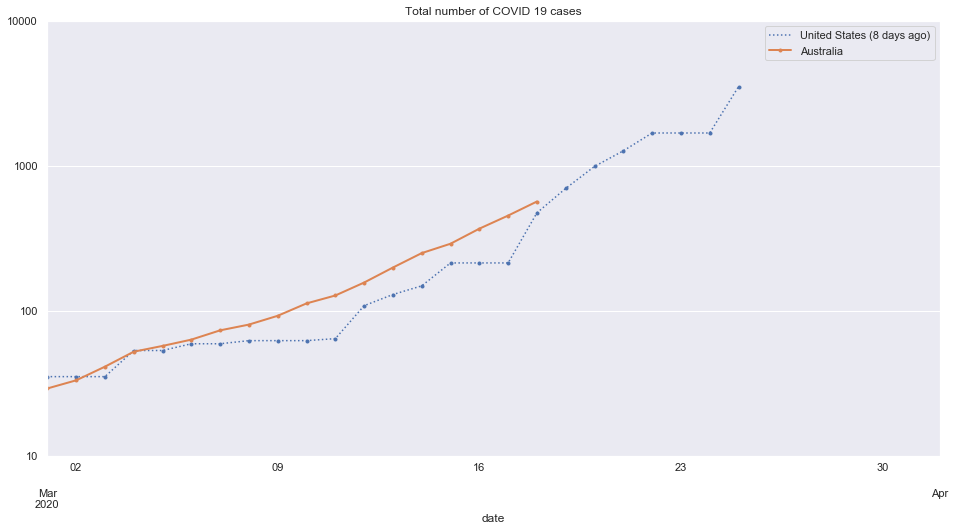

In [98]:
# Plot the offset graph of comparison country (log)
ax = comparison_leading.plot(
    x='date',
    y='total_cases',
    label=f'{country} ({days_behind.days} days ago)',
    figsize=(16, 8),
    ls=':',
    logy=True,
    marker='.'
)
# Plot Australian cases
df_au.plot( y='total_cases', ax=ax, label='Australia', lw=2, marker='.')

# Fix the graph start and end date
ax.set_xlim(datetime.date(2020, 3, 1), datetime.date(2020, 4, 1))
ax.set_title('Total number of COVID 19 cases')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, y: int(x)))
ax.set_ylim(10, 10000)

plt.savefig(f'comparison_Australia_{country}.png', transparent=False)

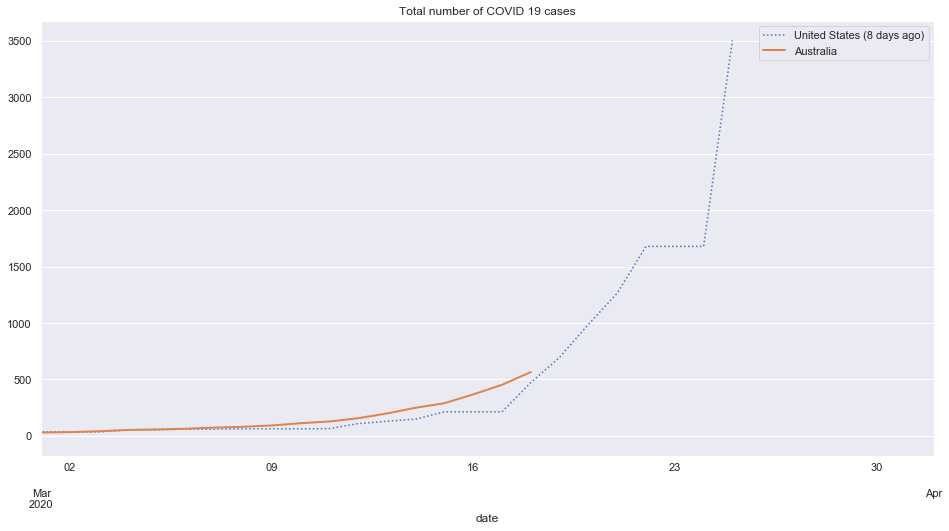

In [96]:
# Plot the offset graph of comparison country (linear)
ax = comparison_leading.plot(
    x='date',
    y='total_cases',
    label=f'{country} ({days_behind.days} days ago)',
    figsize=(16, 8),
    ls=':',
    logy=False
)
# Plot the comparison country
df_au.plot(y='total_cases', ax=ax, label='Australia', lw=2)

# Fix the graph start and end date
ax.set_xlim(datetime.date(2020, 3, 1), datetime.date(2020, 4, 1))
ax.set_title('Total number of COVID 19 cases')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, y: int(x)))


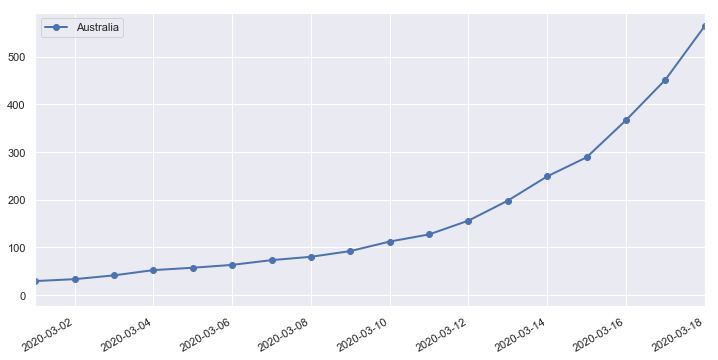

In [49]:
df_au.plot(
    y='total_cases', label='Australia', lw=2,
    xlim=(datetime.date(2020, 3, 1), None),
    marker='o',
    figsize=(12, 6)
)